# Final 34 Articles - Promises



In [1]:
import pandas as pd
import numpy as np
import itertools
from collections import defaultdict

In [2]:
%matplotlib inline 
import matplotlib.pyplot as plt
import matplotlib as mpl
plt.style.use('presentation.mplstyle')
mpl.matplotlib_fname()

'/Users/kylehamilton/MyDocuments/ML-Labs/neuro-symbolic-AI/neuro-symbolic-ai-systematic-review/Scopus/matplotlibrc'

In [3]:
df=pd.read_csv('Data/Final_41 - Promises.csv')

In [4]:
(df).columns

Index(['ID', 'citation', 'Title', 'Nesy Category', 'Kautz category',
       'Type of Learning', 'technical Application',
       'leverages natural language structure',
       'leverages relational structure', 'Knowledge representation',
       'logic vs rules', 'implicit vs explicit', 'reasoning',
       'out-of-distribution generalization', 'interpretability',
       'reduced data', 'transferability',
       'NeSy (check if the authors label their work as NeSy)', 'performance',
       'computational cost', 'comments', 'eliminate'],
      dtype='object')

In [5]:
df.drop(df[df.eliminate == 1].index, inplace=True)

In [6]:
df=df.loc[df['eliminate'] != '1'].reset_index()


In [7]:
len(df)

34

In [9]:
df[['reasoning', 
    'out-of-distribution generalization',
    'leverages natural language structure',
    'leverages relational structure',
    'interpretability', 'reduced data', 'transferability',
    'NeSy (check if the authors label their work as NeSy)']] = df[['reasoning', 
                                                                   'out-of-distribution generalization',
                                                                    'leverages natural language structure',
                                                                    'leverages relational structure',
                                                                    'interpretability', 'reduced data', 'transferability',
                                                                    'NeSy (check if the authors label their work as NeSy)']].astype(int)

In [10]:
df.rename(columns={'reasoning (check if the authors claim their approach does reasoning)': 'reasoning', 'NeSy (check if the authors label their work as NeSy)': 'nesy', 'out-of-distribution generaization': 'OOD'}, inplace=True)


In [11]:
df['nesy_score'] = df['reasoning']+df['out-of-distribution generalization']+df['interpretability']+df['reduced data']+df['transferability']

In [12]:
df = df.rename(columns={'out-of-distribution generalization': 'OOD'}, inplace=False)
df.columns

Index(['index', 'ID', 'citation', 'Title', 'Nesy Category', 'Kautz category',
       'Type of Learning', 'technical Application',
       'leverages natural language structure',
       'leverages relational structure', 'Knowledge representation',
       'logic vs rules', 'implicit vs explicit', 'reasoning', 'OOD',
       'interpretability', 'reduced data', 'transferability', 'nesy',
       'performance', 'computational cost', 'comments', 'eliminate',
       'nesy_score'],
      dtype='object')

In [13]:
nesy=df[df['nesy']==1]

In [14]:
nesy

,index,ID,citation,Title,Nesy Category,Kautz category,Type of Learning,technical Application,leverages natural language structure,leverages relational structure,...,OOD,interpretability,reduced data,transferability,nesy,performance,computational cost,comments,eliminate,nesy_score
3,3,2-s2.0-85075592929,\cite{Bianchi2019161},Complementing logical reasoning with sub-symbo...,compiled,5. Neuro_Symbolic,supervised,inference,0,1,...,1,1,0,0,1,on par with baselines,higher than baselines,Logic Tensor Networks (LTNs). \nThe authors de...,"dual process; ""subsymbolic commonsense"" (stron...",3
4,5,2-s2.0-85096590382,\cite{Lemos2020647},Neural-Symbolic Relational Reasoning on Graph ...,cooperative,3. Neuro; Symbolic,supervised,classification,0,1,...,0,0,0,0,1,better than baselines,NaN,"""reasoning and inference on link prediction""\n...",NaN,1
7,8,JN4IZETG,\cite{Skrlj2021989},autoBOT: evolving neuro-symbolic representatio...,cooperative,3. Neuro; Symbolic,supervised,classification,1,1,...,1,1,1,1,1,on par with baselines,lower than baselines,"""autoBOT also explores novel representation ty...",NaN,4
9,12,7Q5JRVK2,\cite{Diligenti2017143},Semantic-based regularization for learning and...,compiled,5. Neuro_Symbolic,semi-supervised,classification,0,0,...,0,0,1,0,1,better than baselines,NaN,symbolic logic is embedded in the regularizati...,NaN,2
21,27,2-s2.0-85073214635,\cite{Sutherland2019},Leveraging Recursive Processing for Neural-Sym...,sequential,1. symbolic Neuro symbolic,unsupervised,classification,1,0,...,0,1,0,0,1,better than baselines,NaN,leverages symbolic structure but does not reas...,NaN,2
25,32,2-s2.0-85108908770,\cite{Chen2021328},Web question answering with neurosymbolic prog...,nested,2. Symbolic[Neuro],semi-supervised,information extraction,0,0,...,0,0,1,0,1,better than baselines,NaN,The authors don't explictly talk about reasoni...,NaN,1
27,34,2-s2.0-85083954234,\cite{Mao2019},The neuro-symbolic concept learner: Interpreti...,cooperative,3. Neuro; Symbolic,"curriculum,\nunsupervised\n","classification,\ninference",1,0,...,1,1,1,0,1,better than baselines,lower than baselines,The authors acknowledge impllict and explicit ...,NaN,4
33,40,2-s2.0-85106687657,\cite{Demeter20207634},Just Add Functions: A Neural-Symbolic Language...,compiled,4. Neuro: Symbolic → Neuro,supervised,generative,0,0,...,1,0,0,0,1,better than baselines,NaN,NNLM (neural network language model) cannot le...,NaN,2


In [15]:
len(df)

34

In [16]:
df['nesy_score'].value_counts()

1    10
2    10
0     8
3     4
4     2
Name: nesy_score, dtype: int64

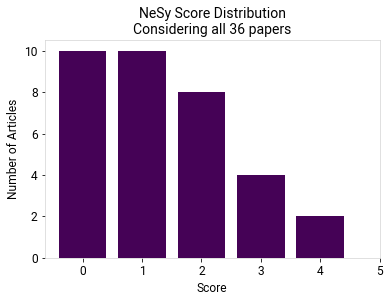

In [17]:
plt.bar([0,1,2,3,4],df['nesy_score'].value_counts())
plt.xticks([0,1,2,3,4,5])
plt.title("NeSy Score Distribution\nConsidering all 36 papers")
plt.xlabel('Score')
plt.ylabel('Number of Articles')
plt.show()

In [18]:
nesy['nesy_score'].value_counts()

2    3
1    2
4    2
3    1
Name: nesy_score, dtype: int64

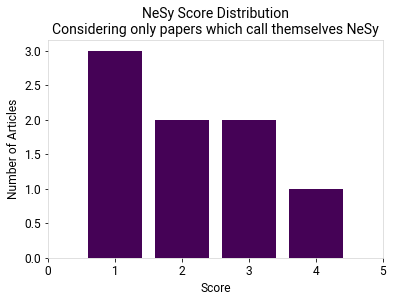

In [19]:
plt.bar([1,2,3,4],nesy['nesy_score'].value_counts())
plt.xticks([0,1,2,3,4,5])
plt.title("NeSy Score Distribution\nConsidering only papers which call themselves NeSy")
plt.xlabel('Score')
plt.ylabel('Number of Articles')
plt.show()

In [20]:
x = ['Reasoning', 'OOD Generaization','Interpretability', 'Reduced data', 'Transferability']

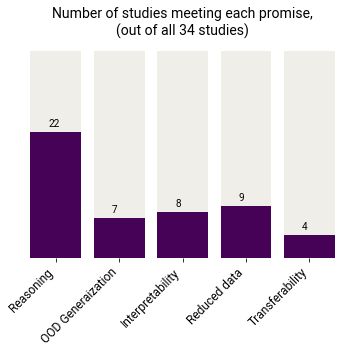

In [31]:
y = [sum(df['reasoning']),sum(df['OOD']),sum(df['interpretability']),sum(df['reduced data']),sum(df['transferability'])]

fig, ax = plt.subplots()

plt.bar(x,[36]*5,color="#efeee8")
plt.bar(x,y,color="#450256")
plt.title("Number of studies meeting each promise,\n(out of all 34 studies)")
plt.box(False)
plt.yticks(range(0, 40, 4))
plt.yticks([])
plt.xticks(rotation=45,ha="right") 

for index,data in enumerate(y):
    ax.text(x=index-0.12 , y = data+1 , s=f"{data}")


plt.savefig("images/all_promises.svg", format="svg")
plt.show()


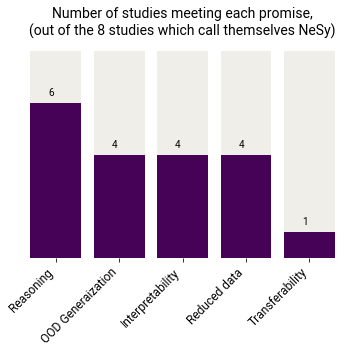

In [30]:
y = [sum(nesy['reasoning']),sum(nesy['OOD']),sum(nesy['interpretability']),sum(nesy['reduced data']),sum(nesy['transferability'])]

fig, ax = plt.subplots()
plt.box(False)
plt.bar(x,[8]*5,color="#efeee8")
plt.bar(x,y,color="#450256")
plt.title("Number of studies meeting each promise,\n(out of the 8 studies which call themselves NeSy)")
plt.yticks(range(0, 8, 1))
plt.yticks([])
plt.xticks(rotation=45,ha="right") 
for index,data in enumerate(y):
    ax.text(x=index-0.12 , y = data+.3 , s=f"{data}")
plt.savefig("images/nesy_promises.svg", format="svg")
plt.show()

In [42]:
heat_df=df[['reasoning', 'OOD', 'interpretability', 'reduced data',
       'transferability', 'nesy','nesy_score']]
heat_df=heat_df.style.background_gradient(cmap='Blues')

In [43]:
# !pip install dataframe_image
# !pip install ipython --upgrade
# !python -m pip install --upgrade pandas

In [44]:
import pandas as pd
print(pd.__version__)

1.3.5


In [45]:
heat_df

,reasoning,OOD,interpretability,reduced data,transferability,nesy,nesy_score
0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0
3,1,1,1,0,0,1,3
4,0,0,0,0,0,0,0
5,1,0,0,0,0,1,1
6,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0
8,0,1,1,1,1,1,4
9,1,0,1,0,0,0,2


In [46]:
# import dataframe_image as dfi
# dfi.export(heat_df,"images/heat_df.png")
print(heat_df.to_latex(convert_css=True)) 

\begin{tabular}{lrrrrrrr}
{} & {reasoning} & {OOD} & {interpretability} & {reduced data} & {transferability} & {nesy} & {nesy_score} \\
0 & {\cellcolor[HTML]{F7FBFF}} \color[HTML]{000000} 0 & {\cellcolor[HTML]{F7FBFF}} \color[HTML]{000000} 0 & {\cellcolor[HTML]{F7FBFF}} \color[HTML]{000000} 0 & {\cellcolor[HTML]{F7FBFF}} \color[HTML]{000000} 0 & {\cellcolor[HTML]{F7FBFF}} \color[HTML]{000000} 0 & {\cellcolor[HTML]{F7FBFF}} \color[HTML]{000000} 0 & {\cellcolor[HTML]{F7FBFF}} \color[HTML]{000000} 0 \\
1 & {\cellcolor[HTML]{F7FBFF}} \color[HTML]{000000} 0 & {\cellcolor[HTML]{F7FBFF}} \color[HTML]{000000} 0 & {\cellcolor[HTML]{F7FBFF}} \color[HTML]{000000} 0 & {\cellcolor[HTML]{F7FBFF}} \color[HTML]{000000} 0 & {\cellcolor[HTML]{F7FBFF}} \color[HTML]{000000} 0 & {\cellcolor[HTML]{F7FBFF}} \color[HTML]{000000} 0 & {\cellcolor[HTML]{F7FBFF}} \color[HTML]{000000} 0 \\
2 & {\cellcolor[HTML]{F7FBFF}} \color[HTML]{000000} 0 & {\cellcolor[HTML]{F7FBFF}} \color[HTML]{000000} 0 & {\cellcolor[HTML]{

In [48]:
df.columns

Index(['level_0', 'index', 'ID', 'citation', 'Title', 'Nesy Category',
       'Kautz category', 'leverages natural language structure',
       'leverages relational structure (KG)', 'Knowledge representation',
       'logic vs rules', 'implicit vs explicit', 'reasoning', 'OOD',
       'interpretability', 'reduced data', 'transferability', 'nesy',
       'performance', 'computational cost', 'comments', 'eliminate',
       'nesy_score'],
      dtype='object')

In [70]:
compiled=df_cat_goal[df_cat_goal['Nesy Category']=='compiled'].sum(axis = 0, skipna = True)

In [71]:
cooperative=df_cat_goal[df_cat_goal['Nesy Category']=='cooperative'].sum(axis = 0, skipna = True)

In [72]:
nested=df_cat_goal[df_cat_goal['Nesy Category']=='nested'].sum(axis = 0, skipna = True)

In [73]:
sequential=df_cat_goal[df_cat_goal['Nesy Category']=='sequential'].sum(axis = 0, skipna = True)

In [79]:
type(compiled)

pandas.core.series.Series

In [74]:
compiled

Nesy Category       compiledcompiledcompiledcompiledcompiledcompil...
reasoning                                                           7
OOD                                                                 3
interpretability                                                    3
reduced data                                                        2
transferability                                                     2
dtype: object

In [76]:
cooperative

Nesy Category       cooperativecooperativecooperativecooperativeco...
reasoning                                                           4
OOD                                                                 2
interpretability                                                    3
reduced data                                                        3
transferability                                                     1
dtype: object

In [77]:
nested

Nesy Category       nestednestednested
reasoning                            2
OOD                                  1
interpretability                     0
reduced data                         1
transferability                      1
dtype: object

In [91]:
sequential[1:].astype(int)

reasoning           9
OOD                 1
interpretability    2
reduced data        3
transferability     0
dtype: int64

In [97]:
sequential[1:].astype(int) / sequential[1:].sum()

reasoning           0.600000
OOD                 0.066667
interpretability    0.133333
reduced data        0.200000
transferability     0.000000
dtype: float64

In [106]:
counts_df = pd.DataFrame({'compiled':compiled[1:].astype(int),
                          'cooperative':cooperative[1:].astype(int),
                          'nested':nested[1:].astype(int),
                          'sequential':sequential[1:].astype(int)})

In [107]:
counts_df

,compiled,cooperative,nested,sequential
reasoning,7,4,2,9
OOD,3,2,1,1
interpretability,3,3,0,2
reduced data,2,3,1,3
transferability,2,1,1,0


In [108]:
counts_df_heat=counts_df.style.background_gradient(cmap='Blues')

In [109]:
counts_df_heat

,compiled,cooperative,nested,sequential
reasoning,7,4,2,9
OOD,3,2,1,1
interpretability,3,3,0,2
reduced data,2,3,1,3
transferability,2,1,1,0


In [96]:
print(counts_df_heat.to_latex(convert_css=True)) 

\begin{tabular}{lrrrr}
{} & {compiled} & {cooperative} & {nested} & {sequential} \\
reasoning & {\cellcolor[HTML]{08306B}} \color[HTML]{F1F1F1} 7 & {\cellcolor[HTML]{08306B}} \color[HTML]{F1F1F1} 4 & {\cellcolor[HTML]{08306B}} \color[HTML]{F1F1F1} 2 & {\cellcolor[HTML]{08306B}} \color[HTML]{F1F1F1} 9 \\
OOD & {\cellcolor[HTML]{D0E1F2}} \color[HTML]{000000} 3 & {\cellcolor[HTML]{ABD0E6}} \color[HTML]{000000} 2 & {\cellcolor[HTML]{6AAED6}} \color[HTML]{F1F1F1} 1 & {\cellcolor[HTML]{E1EDF8}} \color[HTML]{000000} 1 \\
interpretability & {\cellcolor[HTML]{D0E1F2}} \color[HTML]{000000} 3 & {\cellcolor[HTML]{3787C0}} \color[HTML]{F1F1F1} 3 & {\cellcolor[HTML]{F7FBFF}} \color[HTML]{000000} 0 & {\cellcolor[HTML]{CCDFF1}} \color[HTML]{000000} 2 \\
reduced data & {\cellcolor[HTML]{F7FBFF}} \color[HTML]{000000} 2 & {\cellcolor[HTML]{3787C0}} \color[HTML]{F1F1F1} 3 & {\cellcolor[HTML]{6AAED6}} \color[HTML]{F1F1F1} 1 & {\cellcolor[HTML]{ABD0E6}} \color[HTML]{000000} 3 \\
transferability & {\cellcolo